# 金融詐欺偵測(模擬資料)
來源: [Synthetic Financial Datasets For Fraud Detection](https://www.kaggle.com/ntnu-testimon/paysim1)

## 資料介紹

這個資料集是基於非洲行動支付平台商在某月的財務日誌中所擷取出來的真實交易紀錄

資料集的欄位有  
step - 每單位為現實世界的1小時，從1到744,一共為30天  
type - 交易模式，有CASH-IN 存入現金, CASH-OUT 提出現金, DEBIT 借出, PAYMENT 支付, TRANSFER 轉帳
amount - 每次交易的金額
nameOrigh - 執行交易之帳戶
oldbalanceOrg - 交易前金額
newbalanceOrig - 交易後金額
nameDest - 接受交易之帳戶
oldbalanceDest - 交易前金額,如果是商業客戶不會有紀錄
newbalanceDest - 交易後金額,如果是商業客戶不會有紀錄
isFraud - 是否為詐欺交易
isFlaggedFraud - 非法的大量轉帳標記，嘗試單次超過200.000金額的非法轉帳

In [1]:
import pandas as pd
from pprint import pprint
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r".\paysim1.csv")

## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().values.any()

False

datatype正確，而且沒有空值，故不需data cleaning

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
def CatUniDraw(x):
    x1 = pd.DataFrame(x.value_counts())
    x1.columns = ["Count"]
    x2 = ((x1/x.count())*100).round(2)
    x2.columns = ["Percentage"]
    print(x1)
    print("\n")
    print(x2)
    if (len(x1)) <= 20:    
        x1.plot.bar()
        plt.show()
    else:
        pass

In [7]:
dfNF = df[df.isFraud == 0]
dfF = df[df.isFraud == 1]

### 非法轉帳標記(isFlaggedFraud)

     Count
0  6354407
1     8213


   Percentage
0       99.87
1        0.13


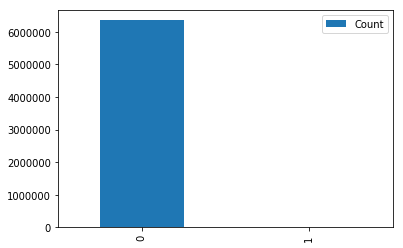

     Count
0  6362604
1       16


   Percentage
0       100.0
1         0.0


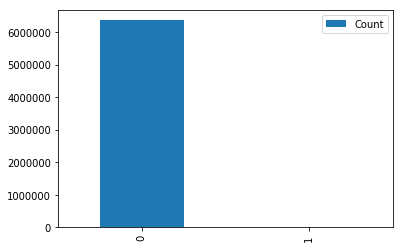

In [8]:
CatUniDraw(df.isFraud)
CatUniDraw(df.isFlaggedFraud)

isFraud                 0       1
isFlaggedFraud                   
0               6354407.0  8197.0
1                     0.0    16.0 

isFraud             0       1
isFlaggedFraud               
0               99.87    0.13
1                0.00  100.00


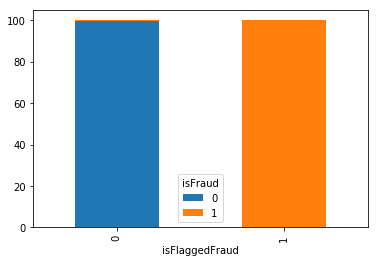

In [9]:
ax = df.groupby(["isFlaggedFraud","isFraud"])["step"].count().unstack()
ax = ax.fillna(0)
axp = ax.agg(lambda x: x/x.sum()*100,axis = 1).round(2)
print(ax,"\n")
print(axp)
axp.plot.bar(stacked =True)
plt.show()

看isFraud 與 isFlaggedFraud之間的關係：  
我們可以發現只要是被標記為非法的大量轉帳標記(isFlaggedFraud==1)的都會被偵測出詐欺(isFraud==1)  
所以可以將isFlaggedFraud採用

In [10]:
#df["day"] = df["step"].map(lambda x: int(x/24) if x%24 == 0  else int(x/24)+1)
#df["hour"] = df["step"].map(lambda x:24 if x%24 == 0 else x%24)

### Step(時間分析)

In [11]:
df["day"] = df["step"].map(lambda x: int((x-1)/24)+1)
df["hour"] = df["step"].map(lambda x:(x-1)%24)
df["week"] = df["day"].map(lambda x: 7 if x%7 == 0 else x%7)

In [12]:
ax = df.groupby(["step","isFraud"])["type"].count().unstack()
ax = ax.fillna(0)
print(ax,"\n")

isFraud        0     1
step                  
1         2692.0  16.0
2         1006.0   8.0
3          548.0   4.0
4          555.0  10.0
5          659.0   6.0
6         1638.0  22.0
7         6825.0  12.0
8        21085.0  12.0
9        37609.0  19.0
10       35980.0  11.0
11       37234.0   7.0
12       36139.0  14.0
13       37501.0  14.0
14       41473.0  12.0
15       44589.0  20.0
16       42461.0  10.0
17       43354.0   7.0
18       49563.0  16.0
19       51341.0  11.0
20       40621.0   4.0
21       19147.0   5.0
22       12612.0  23.0
23        6142.0   2.0
24        3210.0   6.0
25        1580.0  18.0
26         428.0  12.0
27          33.0   8.0
28           0.0   4.0
29           0.0   4.0
30           0.0   8.0
...          ...   ...
714        667.0  14.0
715       1869.0  10.0
716        132.0   8.0
717        620.0  12.0
718        902.0  16.0
719          0.0  14.0
720          0.0  10.0
721          0.0   4.0
722          0.0  10.0
723          0.0  14.0
724        

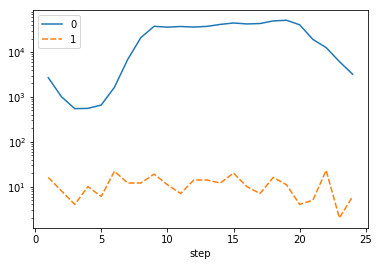

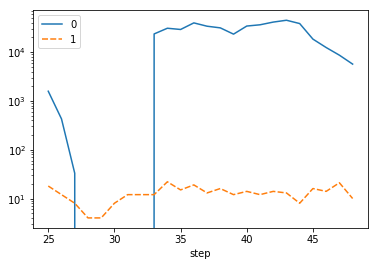

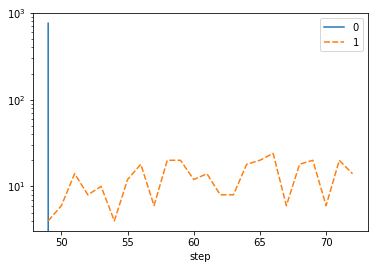

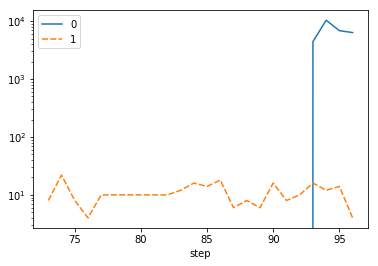

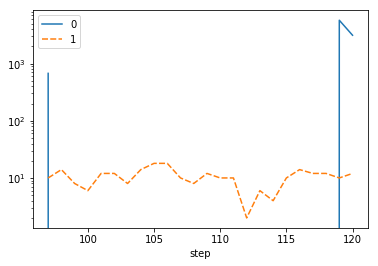

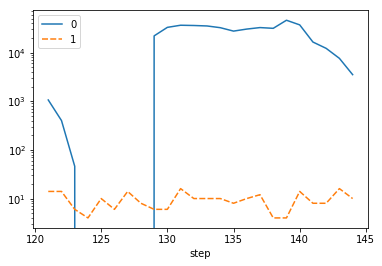

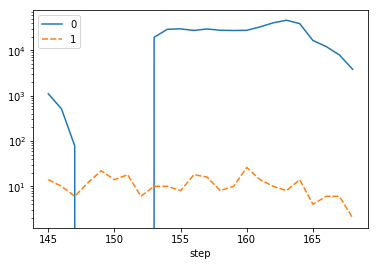

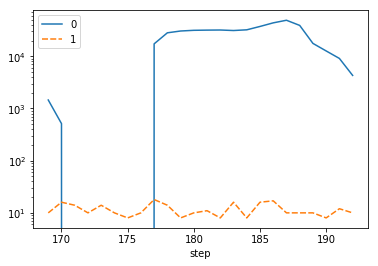

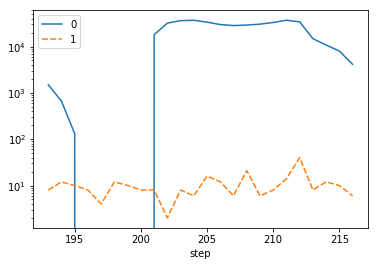

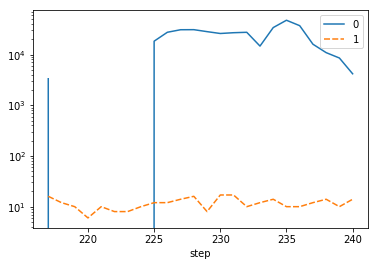

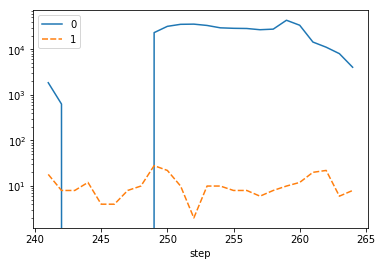

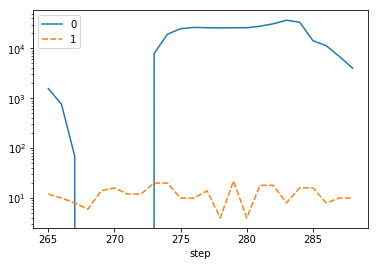

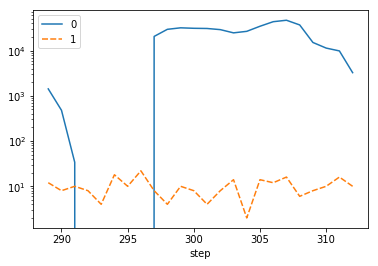

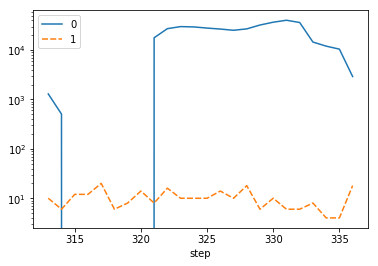

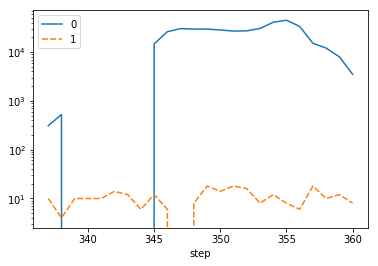

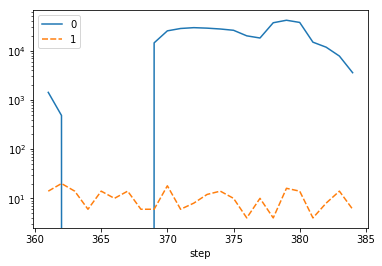

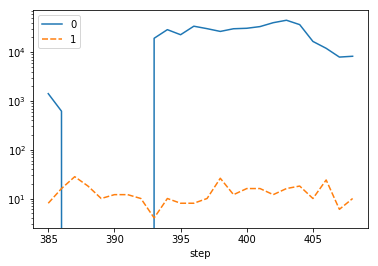

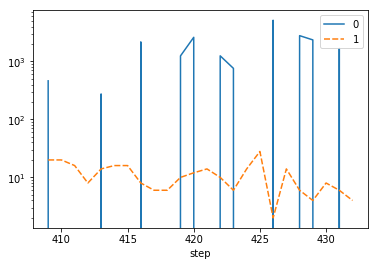

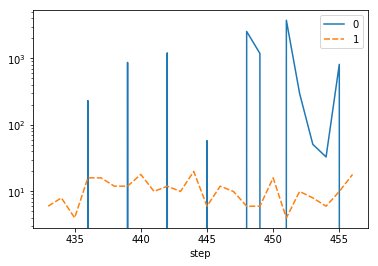

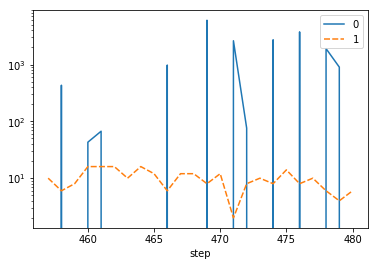

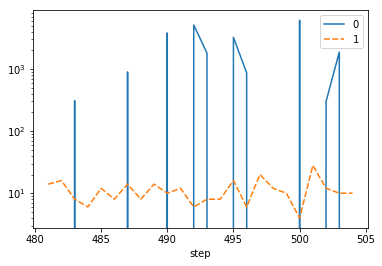

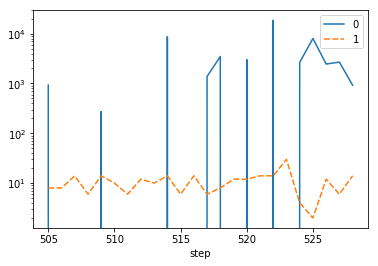

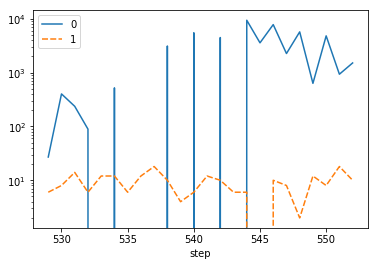

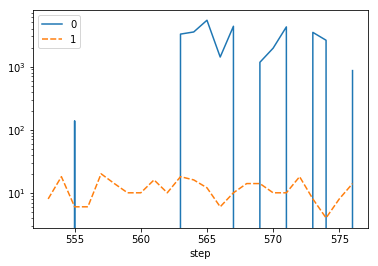

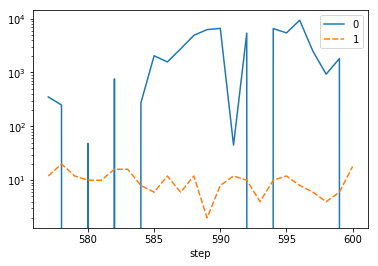

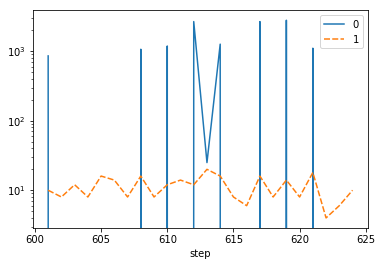

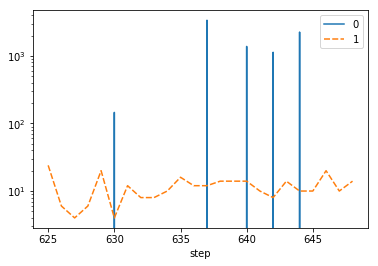

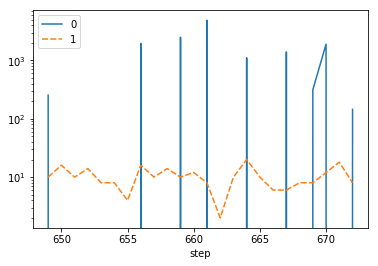

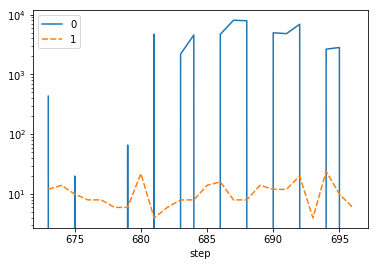

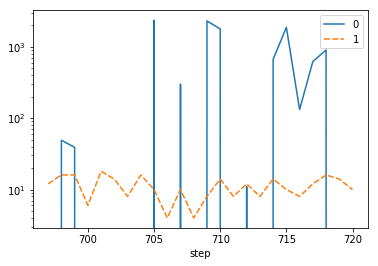

C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


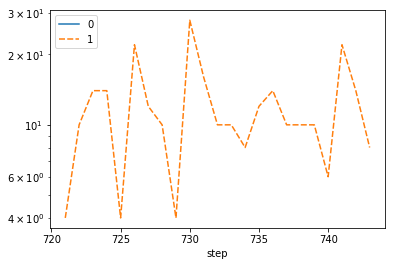

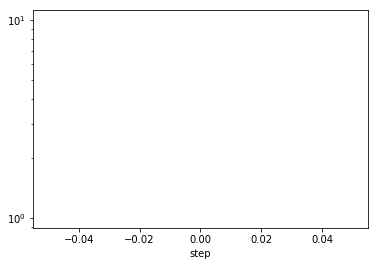

In [13]:
for i in range(0,745,24):
    plt.figure()
    plt.yscale("log")
    ax.iloc[i:i+24]
    sns.lineplot(data=ax.iloc[i:i+24], linestyle='-')
    plt.show()

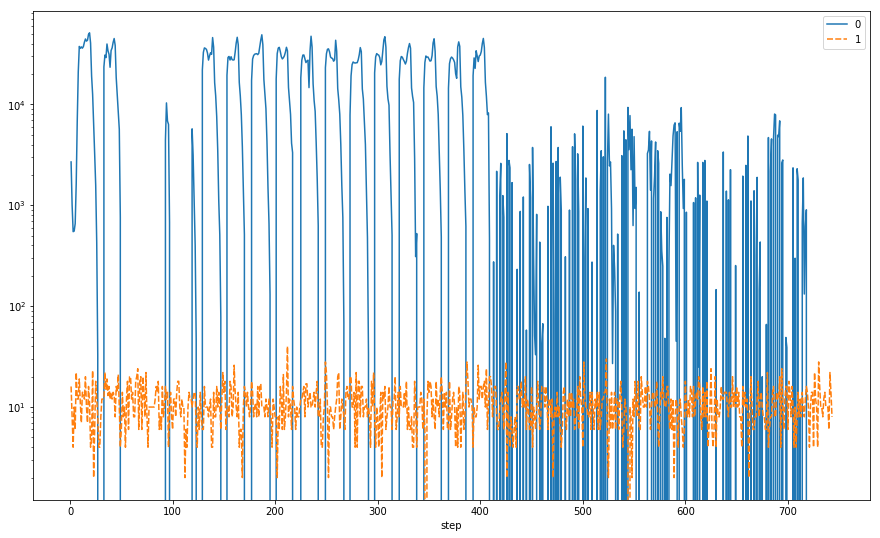

In [14]:
plt.figure(figsize=(15,9))
plt.yscale("log")
sns.lineplot(data=ax, linestyle='-')

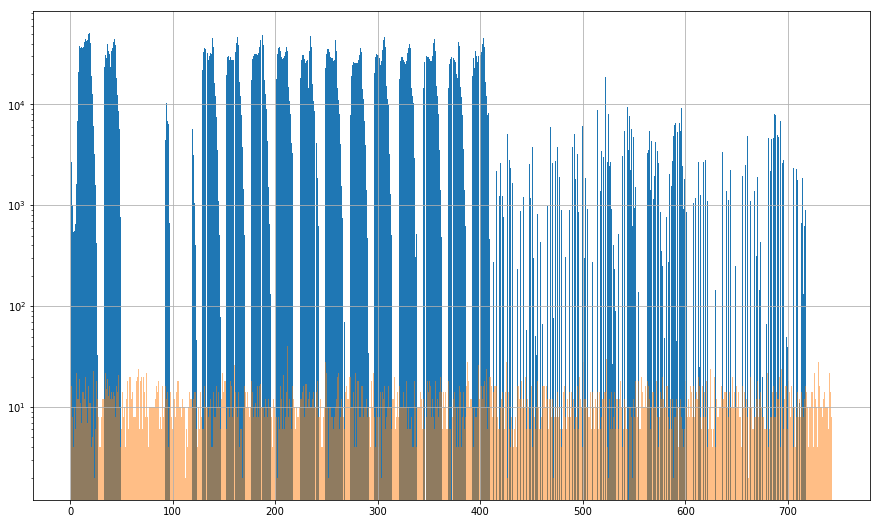

In [15]:
plt.figure(figsize=(15,9))
plt.yscale("log")
df["step"][df.isFraud == 0].hist(bins = 744)
df["step"][df.isFraud == 1].hist(bins = 744,alpha = 0.5)

In [16]:
ax = df.groupby(["hour","isFraud"])["step"].count().unstack()
axp = ax.agg(lambda x: x/x.sum()*100,axis = 1).round(2)
print(ax,"\n")
print(axp)

isFraud       0    1
hour                
0         26753  358
1          8646  372
2          1681  326
3           967  274
4          1275  366
5          3062  358
6          8660  328
7         26547  368
8        283177  341
9        425354  375
10       445668  324
11       483079  339
12       468128  346
13       439300  353
14       416345  341
15       441267  345
16       439588  353
17       580166  343
18       647472  342
19       553388  340
20       247459  347
21       194204  351
22       140934  323
23        71287  300 

isFraud      0      1
hour                 
0        98.68   1.32
1        95.87   4.13
2        83.76  16.24
3        77.92  22.08
4        77.70  22.30
5        89.53  10.47
6        96.35   3.65
7        98.63   1.37
8        99.88   0.12
9        99.91   0.09
10       99.93   0.07
11       99.93   0.07
12       99.93   0.07
13       99.92   0.08
14       99.92   0.08
15       99.92   0.08
16       99.92   0.08
17       99.94   0.06
18       99.

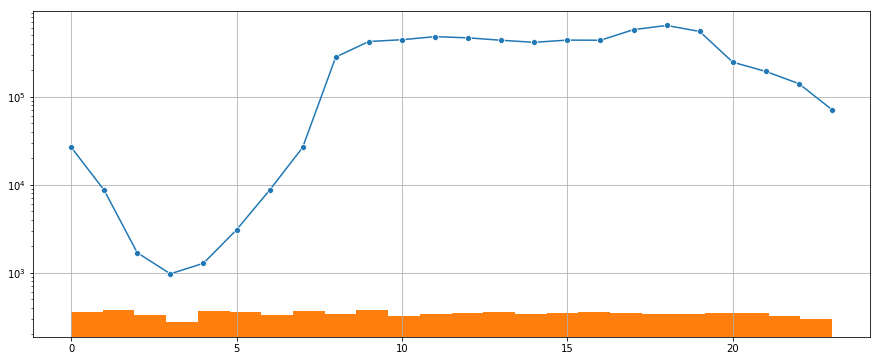

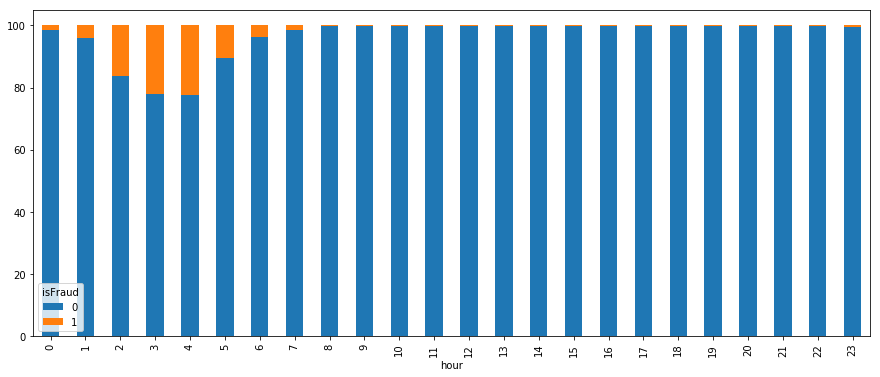

In [17]:
plt.figure(figsize=(15,6))
plt.yscale("log")
sns.lineplot(data=ax[0], linestyle='-', marker='o')
df[df.isFraud == 1]["hour"].hist(bins = 24)
axp.plot.bar(stacked =True,figsize = (15,6))

In [18]:
ax = df.groupby(["week","isFraud"])["step"].count().unstack()
axp = ax.agg(lambda x: (x/x.sum())*100,axis = 1).round(2)
print(ax,"\n")
print(axp)

isFraud        0     1
week                  
1        1532186  1315
2        1309750  1300
3         851298  1464
4         523919  1032
5         383672  1078
6         896907   986
7         856675  1038 

isFraud      0     1
week                
1        99.91  0.09
2        99.90  0.10
3        99.83  0.17
4        99.80  0.20
5        99.72  0.28
6        99.89  0.11
7        99.88  0.12


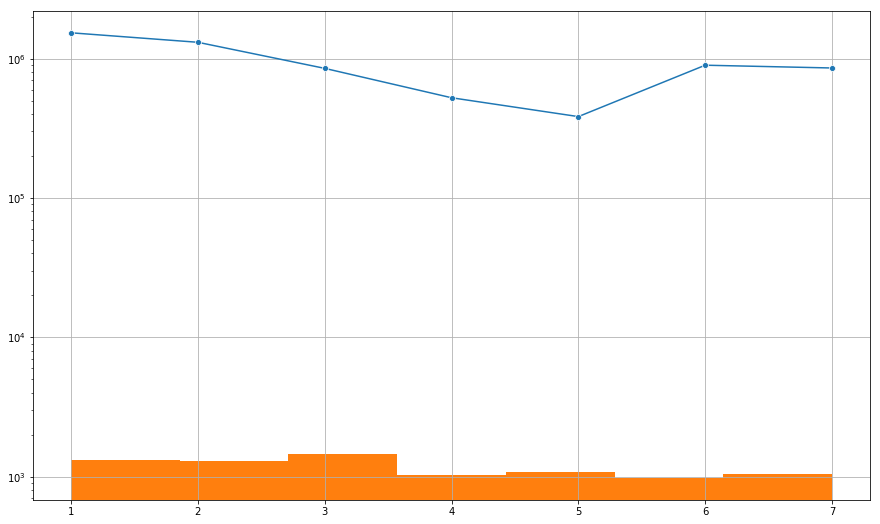

In [19]:
plt.figure(figsize=(15,9))
plt.yscale("log")
sns.lineplot(data=ax[0], linestyle='-', marker='o')
df[df.isFraud == 1]["week"].hist(bins = 7)

In [20]:
ax = df.groupby(["day","isFraud"])["step"].count().unstack()
ax = ax.fillna(0)
axp = ax.agg(lambda x:(x/x.sum())*100,axis =1).round(2)
print(ax,"\n")
print(axp)

isFraud         0      1
day                     
1        573984.0  271.0
2        454929.0  309.0
3           760.0  310.0
4         27978.0  262.0
5          9537.0  252.0
6        440777.0  228.0
7        420311.0  272.0
8        449359.0  278.0
9        417664.0  255.0
10       392663.0  282.0
11       417597.0  262.0
12       349478.0  298.0
13       428341.0  242.0
14       397630.0  246.0
15       401032.0  250.0
16       375342.0  252.0
17       425446.0  320.0
18        20731.0  268.0
19        11044.0  256.0
20        19491.0  236.0
21        24321.0  272.0
22        53181.0  256.0
23        50796.0  216.0
24        32429.0  280.0
25        57613.0  240.0
26        13613.0  272.0
27         8298.0  280.0
28        14413.0  248.0
29        54630.0  260.0
30        11019.0  268.0
31            0.0  272.0 

isFraud      0       1
day                   
1        99.95    0.05
2        99.93    0.07
3        71.03   28.97
4        99.07    0.93
5        97.43    2.57
6        99.

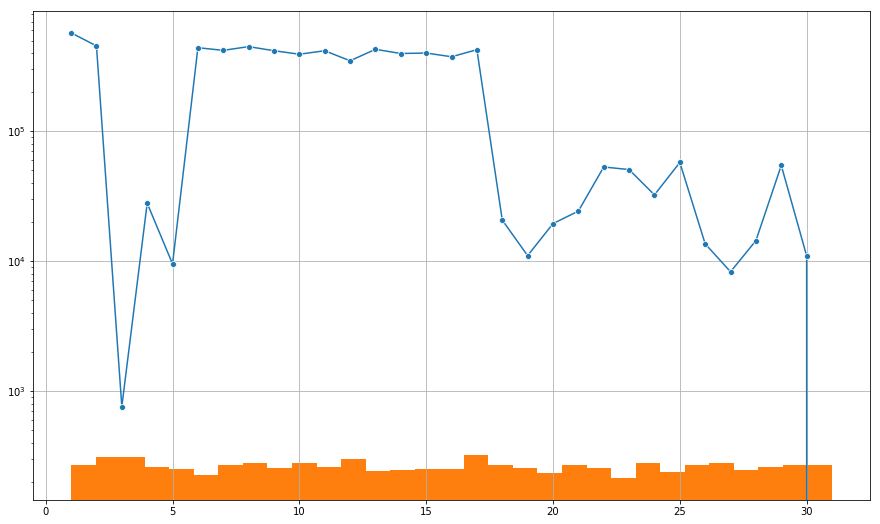

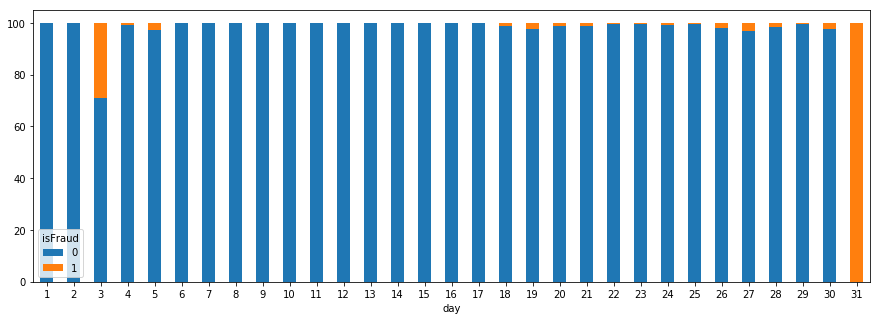

In [21]:
plt.figure(figsize=(15,9))
plt.yscale("log")
sns.lineplot(data=ax[0], linestyle='-', marker='o')
df[df.isFraud == 1]["day"].hist(bins = 31)
axp.plot.bar(stacked =True,figsize = (15,5),rot =0)


            Count
CASH_OUT  2237500
PAYMENT   2151495
CASH_IN   1399284
TRANSFER   532909
DEBIT       41432


          Percentage
CASH_OUT       35.17
PAYMENT        33.81
CASH_IN        21.99
TRANSFER        8.38
DEBIT           0.65


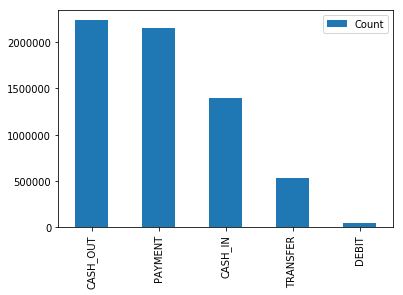

In [22]:
CatUniDraw(df.type)

### 交易模式 type

isFraud           0       1
type                       
CASH_OUT  2233384.0  4116.0
PAYMENT   2151495.0     0.0
CASH_IN   1399284.0     0.0
TRANSFER   528812.0  4097.0
DEBIT       41432.0     0.0 

isFraud        0     1
type                  
CASH_OUT   99.82  0.18
PAYMENT   100.00  0.00
CASH_IN   100.00  0.00
TRANSFER   99.23  0.77
DEBIT     100.00  0.00


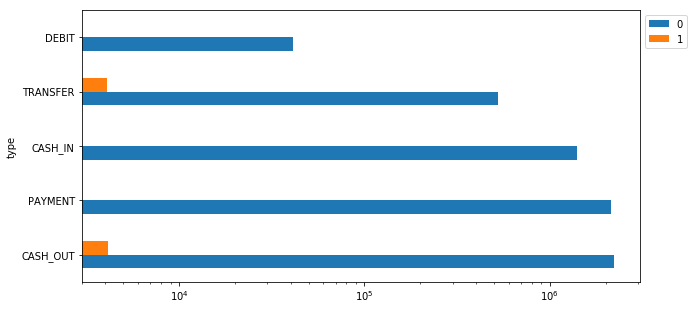

In [23]:
ax = df.groupby(["type","isFraud"])["step"].count().unstack()
ax = ax.fillna(0).sort_values([0],ascending = False)
axp = ax.agg(lambda x:(x/x.sum())*100,axis =1).round(2)
print(ax,"\n")
print(axp)
ax.plot.barh(figsize = (10,5))
plt.xscale("log")
plt.legend(loc='upper left',bbox_to_anchor=(1,1), ncol=1)
plt.show()

我們可以發現:  
所有的詐欺交易(isFraud == 1)都是TRANSFER跟CASH_OUT
所以type這個欄位可以幫助判斷有沒有詐欺交易的可能性，固可以採用

### 交易金額 amount

In [24]:
df.amount.describe().round()

count     6362620.0
mean       179862.0
std        603858.0
min             0.0
25%         13390.0
50%         74872.0
75%        208721.0
max      92445517.0
Name: amount, dtype: float64

Fraud:
 count        8213.00
mean      1467967.30
std       2404252.95
min             0.00
25%        127091.33
50%        441423.44
75%       1517771.48
max      10000000.00
Name: amount, dtype: float64 

Normal:
 count     6354407.00
mean       178197.04
std        596236.98
min             0.01
25%         13368.40
50%         74684.72
75%        208364.76
max      92445516.64
Name: amount, dtype: float64


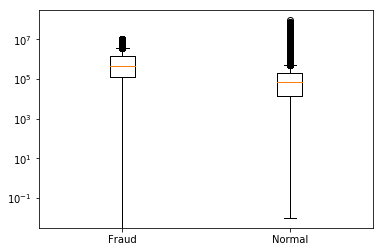

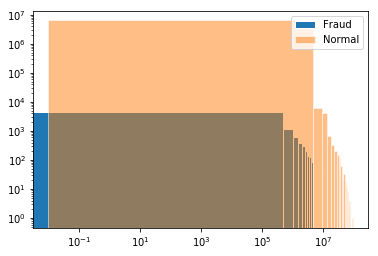

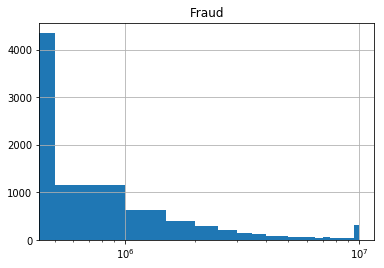

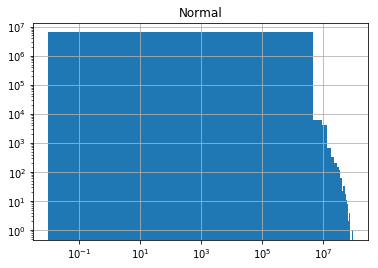

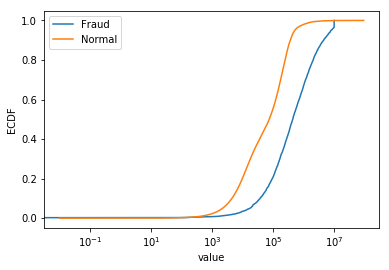

In [25]:
a = dfF.amount
b = dfNF.amount
bins = 20
print("Fraud:\n",a.describe().round(2),"\n")
print("Normal:\n",b.describe().round(2))
ax = plt.subplot()
ax.boxplot([a,b],labels = ["Fraud","Normal"])
plt.yscale("log")
plt.show()

plt.hist(a,bins = bins,edgecolor='w',label = "Fraud")
plt.hist(b,bins = bins,alpha=0.5,edgecolor='w',label = "Normal")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

a.hist(bins = bins)
plt.xscale("log")
plt.title("Fraud")
plt.show()
b.hist(bins = bins)
plt.xscale("log")
plt.yscale("log")
plt.title("Normal")
plt.show()

cdf1 = a.value_counts().sort_index().cumsum()
cdf2 = b.value_counts().sort_index().cumsum()
plt.plot(list(cdf1.index),cdf1/cdf1.max(),label = "Fraud")
plt.plot(list(cdf2.index),cdf2/cdf2.max(),label = "Normal")
plt.xlabel("value")
plt.ylabel("ECDF")
plt.xscale("log")
plt.legend()
plt.show()

詐欺金額整體的平均金額偏高，離散程度較大，但是在交易金額的極端值在正常交易中偏高也偏多

### nameOrigh 執行交易之帳戶

In [26]:
a = pd.DataFrame(df.nameOrig.value_counts()).reset_index().groupby("nameOrig")["index"].count()
b = pd.DataFrame(dfNF.nameOrig.value_counts()).reset_index().groupby("nameOrig")["index"].count()
print(a,"\n",b,"\n",a-b,"\n",(a-b)/a)

nameOrig
1    6344009
2       9283
3         15
Name: index, dtype: int64 
 nameOrig
1    6335852
2       9255
3         15
Name: index, dtype: int64 
 nameOrig
1    8157
2      28
3       0
Name: index, dtype: int64 
 nameOrig
1    0.001286
2    0.003016
3    0.000000
Name: index, dtype: float64


In [27]:
dfOrig = df.groupby(["nameOrig","isFraud"])["step"].count().unstack()
dfOrig = dfOrig.fillna(0)

In [28]:
df["OrigInitial"] = df.nameOrig.map(lambda x:x[:2])

In [29]:
ax = df.groupby(["OrigInitial","isFraud"])["step"].count().unstack()
axp = ax.agg(lambda x: (x/x.sum())*100,axis = 1).round(5)
print(ax,"\n")
print(axp)

isFraud            0     1
OrigInitial               
C1           3286626  4342
C2            766016   920
C3            327507   431
C4            328759   417
C5            329607   402
C6            328907   405
C7            330128   432
C8            328518   408
C9            328339   456 

isFraud             0        1
OrigInitial                   
C1           99.86806  0.13194
C2           99.88004  0.11996
C3           99.86857  0.13143
C4           99.87332  0.12668
C5           99.87819  0.12181
C6           99.87702  0.12298
C7           99.86931  0.13069
C8           99.87596  0.12404
C9           99.86131  0.13869


詐欺交易跟前2位編號開頭的帳戶數量成正比